In [145]:
import numpy as np
import matplotlib.pyplot as plt
import math

We will be solving the 2D advection equation using interpolating SL methods under periodic boundary conditions. 

In [147]:
# Parameters
N = 101 # Number of grid points in each direction
v = [1.65, 2.56] # Velocity in x and y directions
dt = 1 # Time step size
T = 1000 # Number of timesteps

In [148]:
# grid to store states for each timestep
grid = np.zeros((T, N, N))

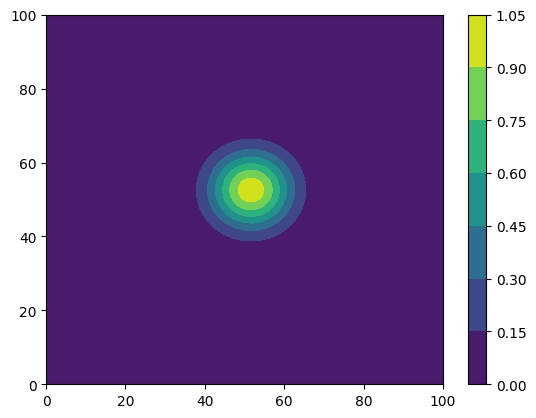

In [149]:
# initial condtions
x = np.linspace(-(N-1)//2, (N-1)//2, N)
y = np.linspace(-(N-1)//2, (N-1)//2, N)
x_grid, y_grid = np.meshgrid(x, y)

grid[0, :, :] = np.exp(-((x_grid/10)**2 + (y_grid/10)**2))
grid[1, :, :] = np.exp(-(((x_grid-v[0]*dt)/10)**2 + ((y_grid-v[1]*dt)/10)**2))

cp = plt.contourf(grid[1, :, :])
plt.colorbar(cp)
plt.show()

In [150]:
# Starting point problem solver, gives us the value of x backtracing for dt timesteps, aka alpha
def starting_point(v, dt):
    return float(v*dt)

# Interpolator Weights, tells the relative weigths of the two points to interpolate between
def interp_weights(alpha):
    frac_pos = 2*alpha - np.floor(2*alpha)
    return [frac_pos[0]*frac_pos[1],
            frac_pos[0]*(1 - frac_pos[1]),
            (1 - frac_pos[0])*frac_pos[1],
            (1 - frac_pos[0])*(1 - frac_pos[1])]

# Semi-Lagrangian interpolation, gives us the value of x at the starting point for the next timestep
def semi_lagrange_interp(grid_array, alpha, T):
    if (2*alpha[0]).is_integer() and (2*alpha[1]).is_integer():
        for t in range(1, T-1):
            grid_array[t + 1, :, :] = np.roll(np.roll(grid_array[t - 1, :, :], 
                                                         shift=- int(- 2*alpha[0]), axis=1), shift=- int(- 2*alpha[1]), axis=0)
    elif (2*alpha[1]).is_integer():
        f_1 = 2*alpha[0] - np.floor(2*alpha[0])
        shift_x = int(np.floor(2*alpha[0]))
        shift_y = int(2*alpha[1])
        for t in range(1, T-1):
            rolled_grid_prev = np.roll(grid_array[t - 1, :, :], shift= shift_y, axis=0)
            grid_array[t+1, :, :] = f_1 * np.roll(rolled_grid_prev, shift= shift_x + 1, axis=1) + (1 - f_1) * np.roll(rolled_grid_prev, shift= shift_x, axis=1)
    else:
        shift_x = int(np.floor(2*alpha[0]))
        shift_y = int(np.floor(2*alpha[1]))
        f_1 = 2*alpha[0] - np.floor(2*alpha[0])
        f_2 = 2*alpha[1] - np.floor(2*alpha[1])
        for t in range(1, T-1):
            temp_mat_1 = np.roll(grid_array[t - 1, :, :], shift = shift_y, axis = 0)
            temp_mat_2 = np.roll(grid_array[t - 1, :, :], shift = shift_y + 1, axis = 0)
            grid_array[t+1, :, :] = (1 - f_2)*(f_1*np.roll(temp_mat_1[:, :], shift = shift_x + 1, axis = 1) + (1 - f_1)*np.roll(temp_mat_1[:, :], shift = shift_x, axis = 1)) + f_2*(f_1*np.roll(temp_mat_2[:, :], shift = shift_x + 1, axis = 1) + (1 - f_1)*np.roll(temp_mat_2[:, :], shift = shift_x, axis = 1))

In [151]:
alpha_0 = [starting_point(v[0], dt), starting_point(v[1], dt)]
semi_lagrange_interp(grid, alpha_0, T)

# Velocity Test

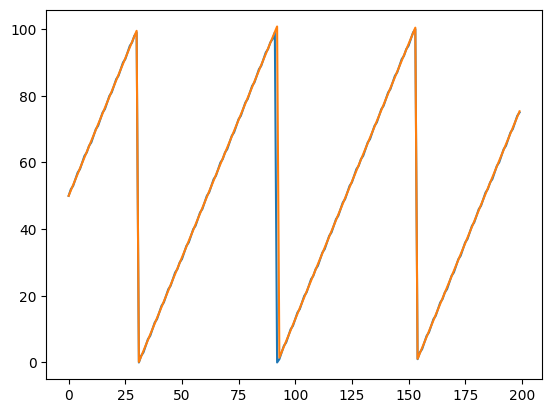

In [143]:
# x coordinate check
time = np.array([t for t in range(len(grid))])
x_centre = [np.argmax(grid[t, :, :])%N for t in range(len(grid))]
plt.plot(time, x_centre)
plt.plot(time, (50 + v[0]*time)%N)

In [55]:
print(x_centre)

[50, 52, 53, 55, 57, 59, 60, 62, 64, 65, 67, 69, 71, 72, 74, 76, 78, 79, 81, 83, 84, 86, 88, 89, 91, 93, 95, 96, 98, 100, 1, 2, 4, 6, 7, 9, 11, 13, 14, 16, 18, 19, 21, 23, 25, 26, 28, 30, 32, 33, 35, 37, 38, 40, 42, 44, 45, 47, 49, 50, 52, 54, 56, 57, 59, 61, 63, 64, 66, 68, 69, 71, 73, 74, 76, 78, 80, 81, 83, 85, 87, 88, 90, 92, 93, 95, 97, 99, 100, 1, 3, 4, 6, 8, 10, 11, 13, 15, 17, 18, 20, 22, 23, 25, 27, 29, 30, 32, 34, 35, 37, 39, 41, 42, 44, 46, 48, 49, 51, 53, 54, 56, 58, 59, 61, 63, 65, 66, 68, 70, 72, 73, 75, 77, 78, 80, 82, 84, 85, 87, 89, 90, 92, 94, 96, 97, 99, 0, 2, 3, 5, 7, 8, 10, 12, 14, 15, 17, 19, 20, 22, 24, 26, 27, 29, 31, 33, 34, 36, 38, 39, 41, 43, 44, 46, 48, 50, 51, 53, 55, 57, 58, 60, 62, 63, 65, 67, 69, 70, 72, 74, 75, 77, 79, 81, 82, 84, 86, 88, 89]


In [56]:
sim_v_x = (x_centre[-1] + 101*3 - x_centre[0])/(len(grid) - 1)
print(sim_v_x)

1.7185929648241205


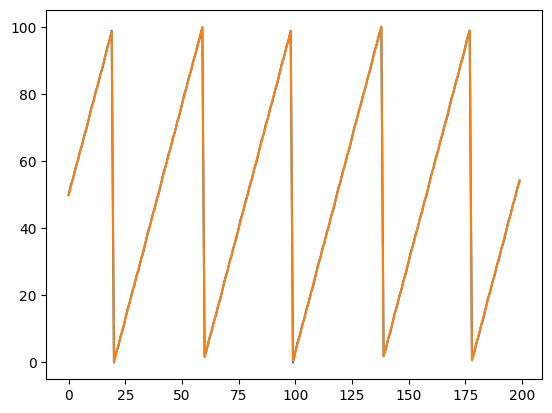

In [144]:
# y coordinate check
time = np.array([t for t in range(len(grid))])
y_centre = [np.argmax(grid[t, :, :])//N for t in range(len(grid))]
plt.plot(time, y_centre)
plt.plot(time, (50 + v[1]*time)%N)

In [58]:
sim_v_y = (y_centre[-1] + 101*5 - y_centre[0])/(len(grid) - 1)
print(sim_v_y)

2.6733668341708543


In [152]:
from video_creator_2d import create_video

create_video(grid, '2d_interp_advec.mp4')

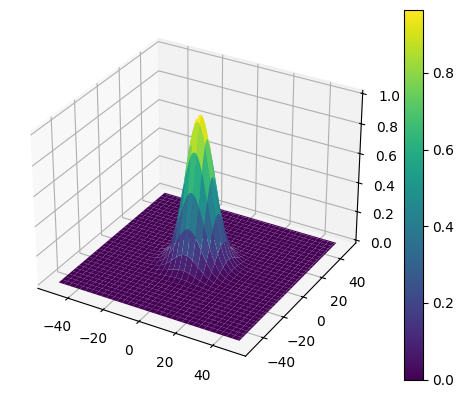

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-(N-1)//2, (N-1)//2, N)
y = np.linspace(-(N-1)//2, (N-1)//2, N)
x_grid, y_grid = np.meshgrid(x, y)
z = grid[0, :, :]  # The initial condition values as heights

# Plotting the surface
surf = ax.plot_surface(x_grid, y_grid, z, cmap='viridis')
plt.colorbar(surf)
plt.show()